<a href="https://colab.research.google.com/github/ZoyaAnsarii/Deep-Learning/blob/main/ML_DL_Small_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__


'2.11.0'

In [3]:
import os, shutil


In [4]:
original_dataset_dir = '/content/cats_and_dogs_small.zip'

In [10]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_small.zip'
zip_ref = zipfile. ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
train_cats_dir = '/tmp/cats_and_dogs_small/train/cats'
train_dogs_dir = '/tmp/cats_and_dogs_small/train/dogs'
validation_cats_dir = '/tmp/cats_and_dogs_small/validation/cats'
validation_dogs_dir = '/tmp/cats_and_dogs_small/validation/dogs'
test_cats_dir = '/tmp/cats_and_dogs_small/test/cats'
test_dogs_dir = '/tmp/cats_and_dogs_small/test/dogs'
train_dir= '/tmp/cats_and_dogs_small/train'
validation_dir= '/tmp/cats_and_dogs_small/validation'
test_dir= '/tmp/cats_and_dogs_small/test'

In [6]:
os. getcwd() 

'/content'

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 200
total training dog images: 200
total validation cat images: 200
total validation dog images: 200
total test cat images: 100


In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=2)

<ipython-input-14-bee2cb5142f1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/7
20/20 [==============================] - 11s 81ms/step - loss: 0.6916 - acc: 0.5150 - val_loss: 0.7025 - val_acc: 0.5000
Epoch 2/7
20/20 [==============================] - 2s 101ms/step - loss: 0.6930 - acc: 0.5175 - val_loss: 0.6823 - val_acc: 0.5500
Epoch 3/7
20/20 [==============================] - 1s 70ms/step - loss: 0.6745 - acc: 0.5925 - val_loss: 0.6804 - val_acc: 0.5750
Epoch 4/7
20/20 [==============================] - 1s 69ms/step - loss: 0.6613 - acc: 0.6325 - val_loss: 0.7058 - val_acc: 0.4250
Epoch 5/7
20/20 [==============================] - 1s 72ms/step - loss: 0.6469 - acc: 0.6325 - val_loss: 0.6684 - val_acc: 0.6000
Epoch 6/7
20/20 [==============================] - 1s 71ms/step - loss: 0.6163 - acc: 0.6950 - val_loss: 0.6063 - val_acc: 0.7250
Epoch 7/7
20/20 [==============================] - 1s 69ms/step - loss: 0.5940 - acc: 0.7025 - val_loss: 0.6305 - val_acc: 0.5750


In [15]:
model.save('cats_and_dogs_small_1.h5')


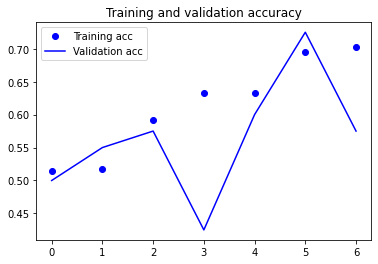

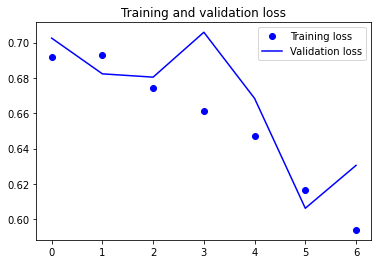

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [17]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [18]:
import tensorflow as tf

In [19]:
!pip install keras.preprocessing.image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


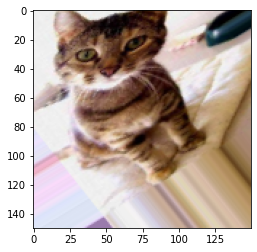

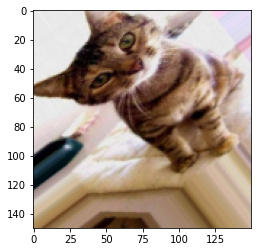

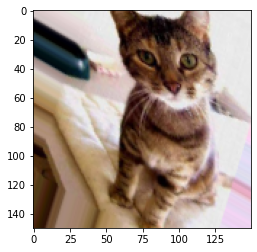

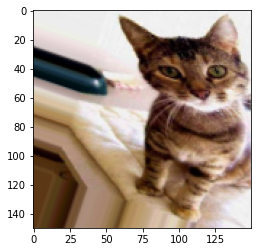

In [20]:
# This is module with image preprocessing utilities

from keras.preprocessing import image
tf.keras.utils.load_img
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = tf.keras.utils.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=2)

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


<ipython-input-25-142d29c68d0c>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/7
10/10 [==============================] - 4s 366ms/step - loss: 0.6944 - acc: 0.4594 - val_loss: 0.6873 - val_acc: 0.5156
Epoch 2/7
10/10 [==============================] - 3s 283ms/step - loss: 0.6869 - acc: 0.5395 - val_loss: 0.6843 - val_acc: 0.7031
Epoch 3/7
10/10 [==============================] - 3s 258ms/step - loss: 0.6890 - acc: 0.5559 - val_loss: 0.6733 - val_acc: 0.5938
Epoch 4/7
10/10 [==============================] - 3s 258ms/step - loss: 0.6827 - acc: 0.5461 - val_loss: 0.6691 - val_acc: 0.6562
Epoch 5/7
10/10 [==============================] - 3s 255ms/step - loss: 0.6805 - acc: 0.5592 - val_loss: 0.6648 - val_acc: 0.6250
Epoch 6/7
10/10 [==============================] - 3s 254ms/step - loss: 0.6799 - acc: 0.5789 - val_loss: 0.6970 - val_acc: 0.4531
Epoch 7/7
10/10 [==============================] - 3s 255ms/step - loss: 0.6579 - acc: 0.6151 - val_loss: 0.7507 - val_acc: 0.5156


In [26]:
model.save('cats_and_dogs_small_2.h5')

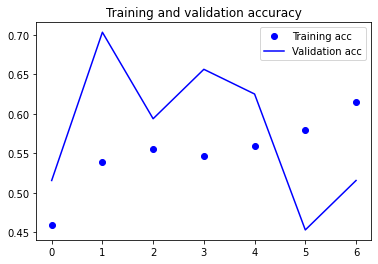

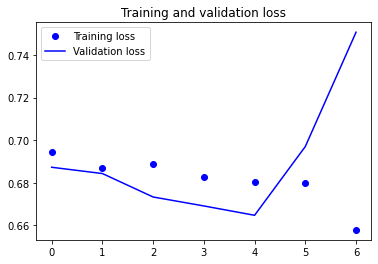

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()